# Seaborn을 사용한 데이터 분포 시각화

- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- 기본적인 시각화 기능은 Matplotlib패키지에 의존하며, 통계기능은 Statsmodels 패키지에 의존

- 참조 사이트
- seaborn: statistical data visualization 
- datascienceschoo


## 스타일
- Seanorn을 임포트하면 색상 등을 Matplotlib에서 제공하는 기본 스타일이 아닌 Seaborm에서 지정한 기본 스타일로 바귐
- 동일한 Matplotlib명령을 수행해도 Seaborn을 임포트 한 것과 하지 않은 plot의 모양이 다르다


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

%matplotlib inline




In [6]:
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()


# plt.rc('font', family='nanumgothic')
# plt.rc('axes', unicode_minus=False)

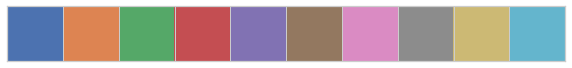

In [8]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

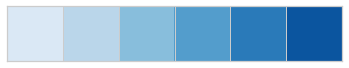

In [10]:

sns.palplot(sns.color_palette('Blues'))

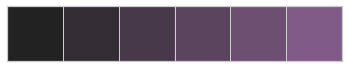

In [11]:
sns.palplot(sns.dark_palette('muted purple', input='xkcd'))

# 1. boxplot

> http://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

In [15]:
import matplotlib.pyplot as plt
import seaborn as nsn

plt.rcParams['figure.figsize'] = (12, 6)

sns.set_style('whitegrid')
sns.set()

In [21]:
# tips 데이터 가져오기
tips = nsn.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


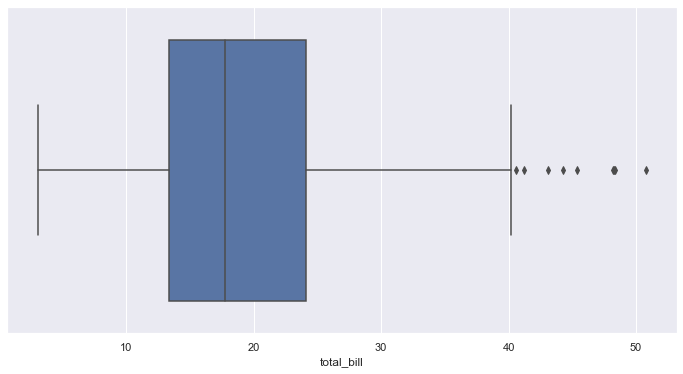

In [22]:
sns.boxplot(x = tips['total_bill'])
plt.show()

In [20]:
tips.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

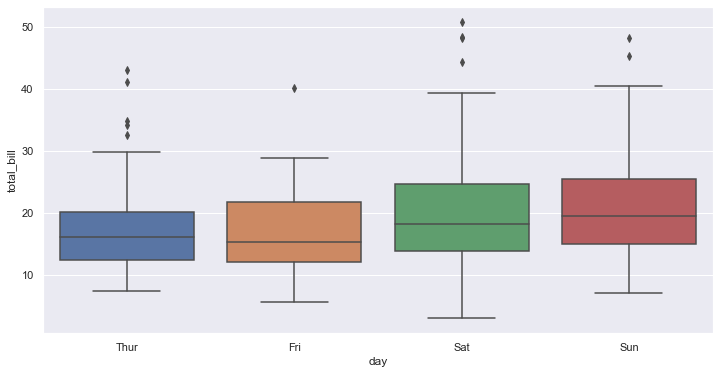

In [23]:
sns.boxplot(x = 'day', y = 'total_bill',data = tips)
plt.show()

http://seaborn.pydata.org/examples/color_palettes.html?highlight=palette

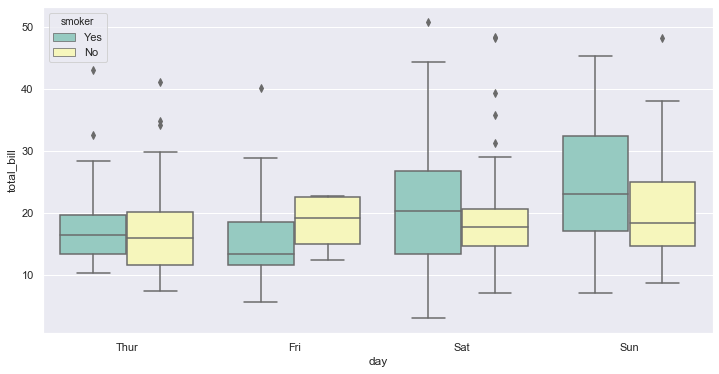

In [26]:
sns.boxplot(x = 'day', y = 'total_bill',hue = 'smoker', data = tips, palette='Set3')

plt.show()

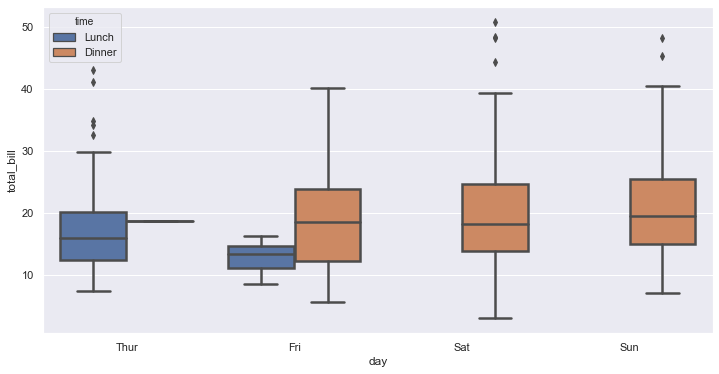

In [27]:
sns.boxplot(x = 'day', y = 'total_bill',hue = 'time', data = tips, linewidth = 2.5 )
plt.show()

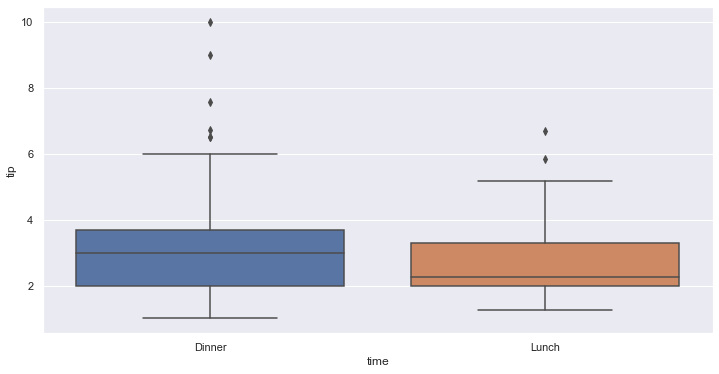

In [32]:
sns.boxplot(x = 'time', y = 'tip',data = tips, order=['Dinner','Lunch'])
plt.show()

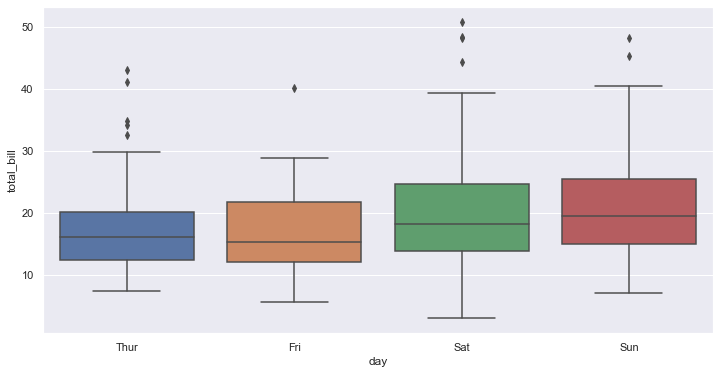

In [33]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips)
plt.show()

## Iris dataset

In [29]:
# data road
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


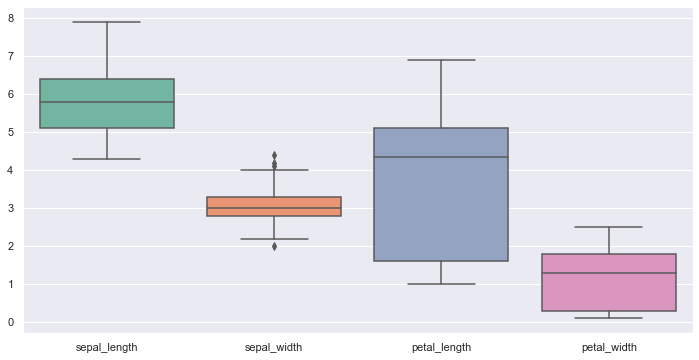

In [30]:
# sns를 이용하면 수치형 데이터만 boxplot을 그려줌
sns.boxplot(data = iris, palette = 'Set2')
plt.show()

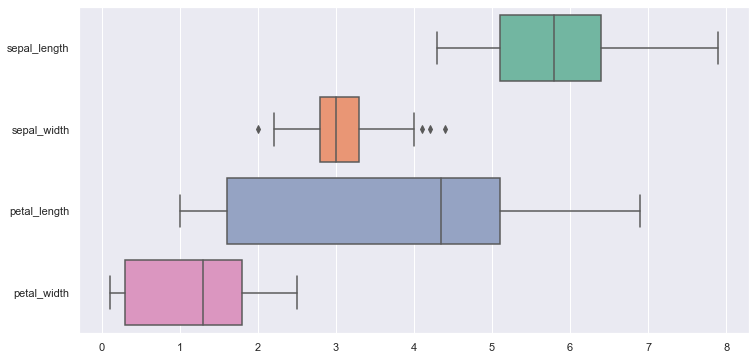

In [31]:
# 가로로 눕히기
sns.boxplot(data = iris, orient = 'h', palette = 'Set2')
plt.show()

# 2. swarmplot

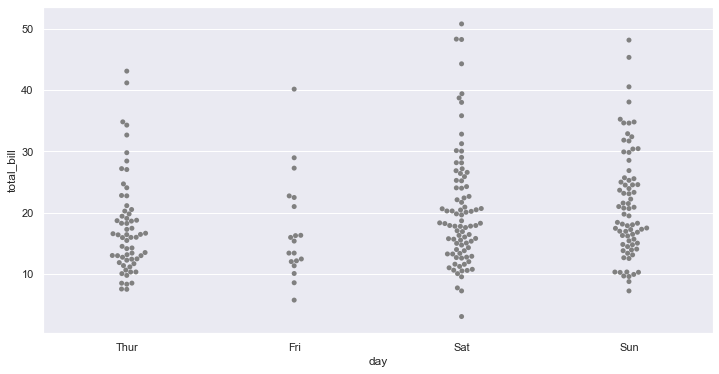

In [35]:
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = '.5')
plt.show()

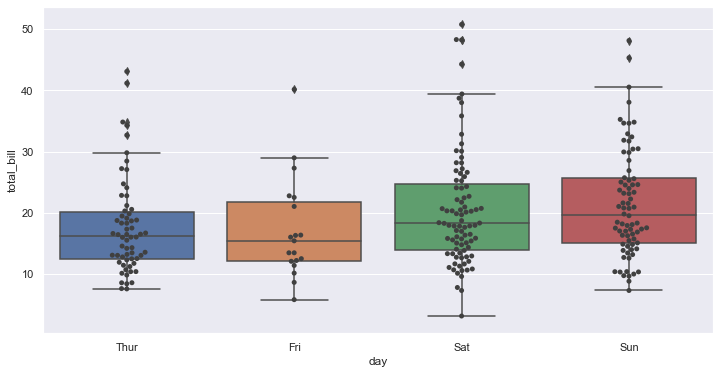

In [36]:
# boxㅔplot과 함께 그리기
sns.boxplot(x = 'day',y = 'total_bill',data = tips)
sns.swarmplot(x = 'day',y = 'total_bill', data = tips, color = '.25')
plt.show()

C:\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


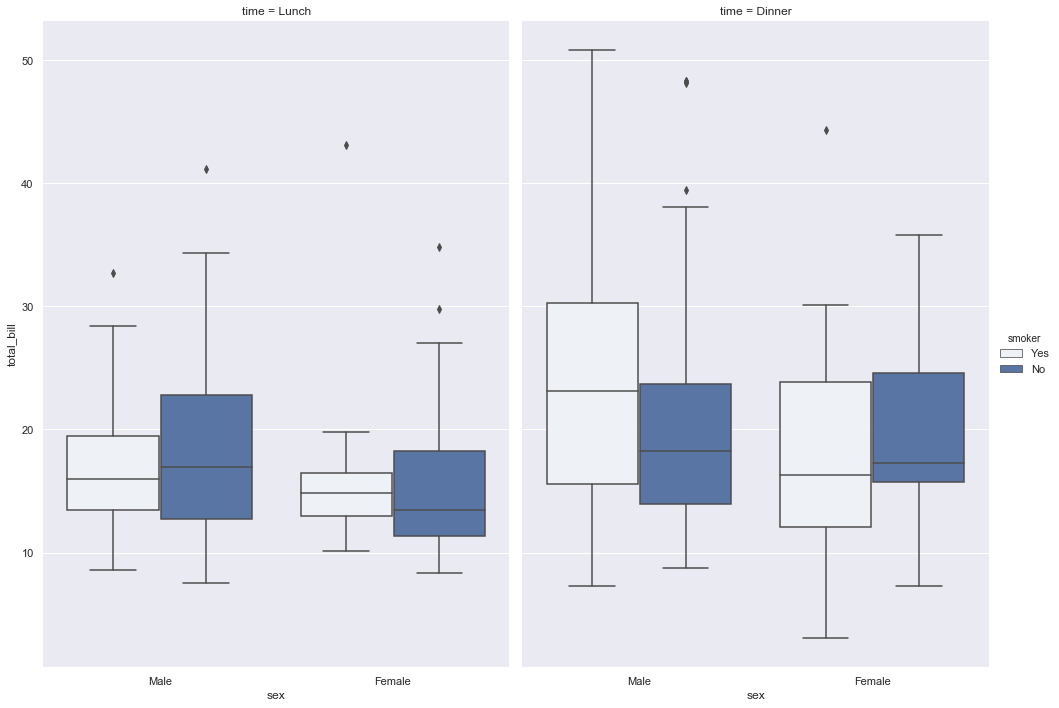

In [44]:
# 그리드 나누기
g = sns.FacetGrid(tips, col="time", size=10, aspect=.7)  # grid 기준: time
# size: 그림 사이즈, aspect: 그림 폭
(g.map(sns.boxplot, "sex", "total_bill", "smoker").despine(left=True).add_legend(title="smoker"))  
#legend: 범례 추가
# hue = smoker
plt.show()

# 3. Implot

- 상관관계 볼 때 사용
- 평균, 분산 정도 파악
- http://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")

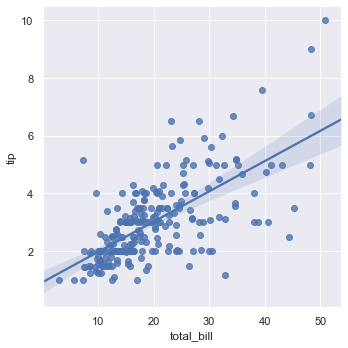

In [49]:

sns.set(color_codes=True)
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)
plt.show()

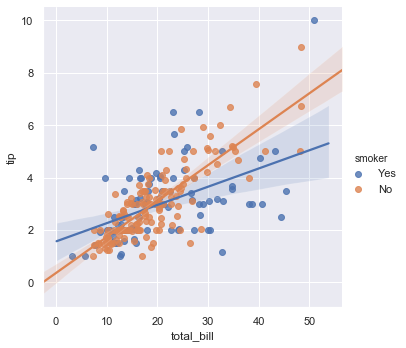

In [51]:
# 두개 그릴 때
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips)
plt.show()

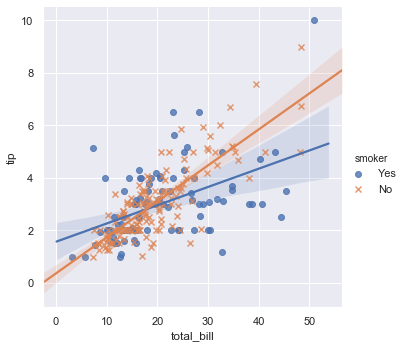

In [54]:
# 마커 지정
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips, markers =['o','x'])
plt.show()

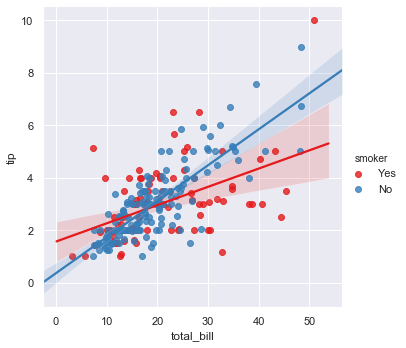

In [57]:
# 색 지정
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips, palette='Set1')
plt.show()

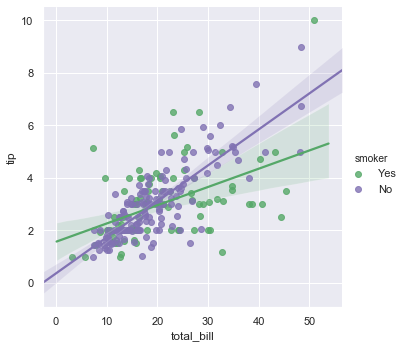

In [59]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips, palette = dict(Yes = 'g', No = 'm'))
plt.show()

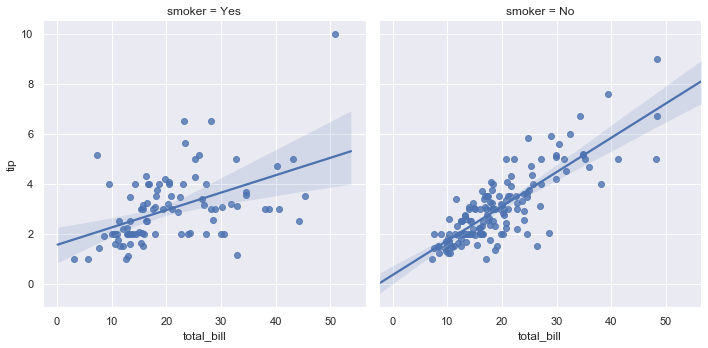

In [60]:
# 그리드 나누기
sns.lmplot(x = 'total_bill', y = 'tip', col = 'smoker', data = tips)
plt.show()

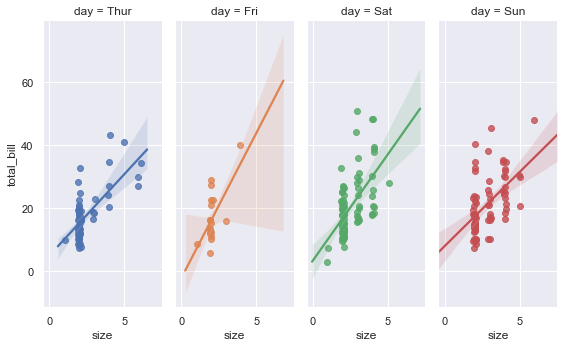

In [61]:
# 그리드정보, 색상 정보 추가
sns.lmplot(x="size", y="total_bill", hue="day", col="day", data=tips, aspect=.4, x_jitter=.1)
plt.show()

C:\Python\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


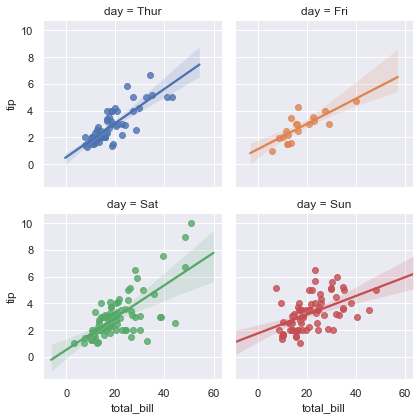

In [62]:
# 그리드 모양 변경: col_wrap 이용
sns.lmplot(x="total_bill", y="tip", col="day", hue="day", data=tips, col_wrap=2, size=3)
plt.show()

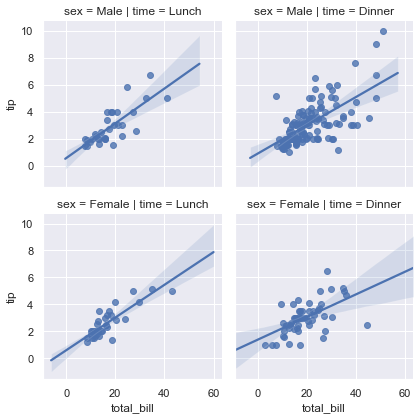

In [64]:
# 그리드를 나눌 때 기준을 2가지 적용하기
sns.lmplot(x="total_bill", y="tip", row="sex", col="time", data=tips, size=3)
plt.show()

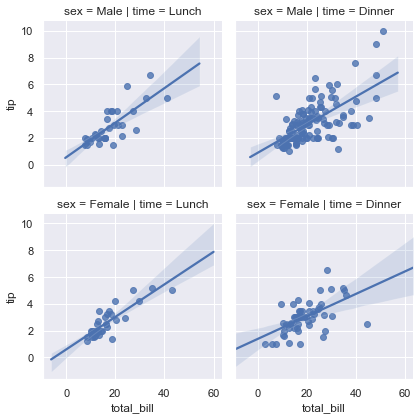

In [65]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time", data=tips, size=3)
g = (g.set_axis_labels("Total bill (US Dollars)", "Tip")
     .set(xlim=(0, 60), ylim=(0, 12), 
          xticks=[10, 30, 50], yticks=[2, 6, 10])
     .fig.subplots_adjust(wspace=.02))
plt.show()

# 5. kdeplot

- 다차원의 평균, 정규분포 표현
- http://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot
- 많이 사용하지 않음

In [66]:
sns.set(color_codes = True)

In [67]:
np.random.seed(10)

In [78]:
mean, cov = [0,5], [(1,5),(5,1)]  # 평균, 공분산

In [75]:
# 다차원 정규 분포를 갖는 랜덤한 값 생성
x, y = np.random.multivariate_normal(mean, cov, size=50).T


C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


In [74]:
?np.random.multivariate_normal

In [76]:
x

array([ 1.47033579,  2.00176288, -0.7873717 , -1.66891802, -0.81934056,
        2.59349947, -1.22426117,  1.31361962,  4.58185516,  0.81751759,
        2.18493087, -3.35957251,  0.18762699,  0.4864277 , -0.80911908,
        2.57666075, -0.04219941,  0.46914583, -0.72475448,  2.84839766,
        4.25923123,  0.22287694,  1.37922035, -3.66717844, -1.25383006,
       -0.18084536,  2.48318158,  1.87779285,  1.96347004, -1.13484547,
       -2.89946551, -2.58549526,  1.37060713,  1.86369409, -1.86567122,
       -0.32848284, -1.34047915,  1.74476545, -3.12833982, -1.8499179 ,
        2.65673447, -1.1602965 , -3.58032433, -1.5303778 , -5.08538862,
        0.97010555, -0.60648644, -1.37488036, -0.56425758,  0.88921731])

In [77]:
y

array([3.06846239, 6.54808553, 9.70345297, 3.25124293, 8.66810548,
       3.79724317, 4.83006733, 6.01433785, 5.77816795, 2.43938395,
       4.76711003, 5.97660064, 4.29635801, 6.50514551, 4.29812889,
       5.90377879, 4.25301691, 4.19912059, 6.7154945 , 4.72135896,
       7.73035121, 9.77339295, 7.10763544, 6.13662641, 0.45466226,
       5.64009376, 5.81995161, 2.88387187, 5.41365058, 6.26087828,
       1.30969101, 5.43687064, 6.13262452, 5.16091797, 5.34712949,
       4.66013299, 6.90885262, 6.1495209 , 4.61579402, 2.6334773 ,
       6.74204962, 3.09188238, 0.54663165, 3.4384453 , 6.69031225,
       7.00043957, 3.86083245, 2.6155435 , 4.84604689, 3.5430017 ])

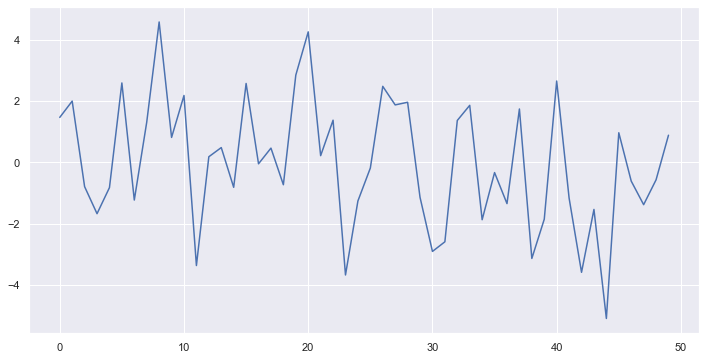

In [79]:
plt.plot(x)
plt.show()

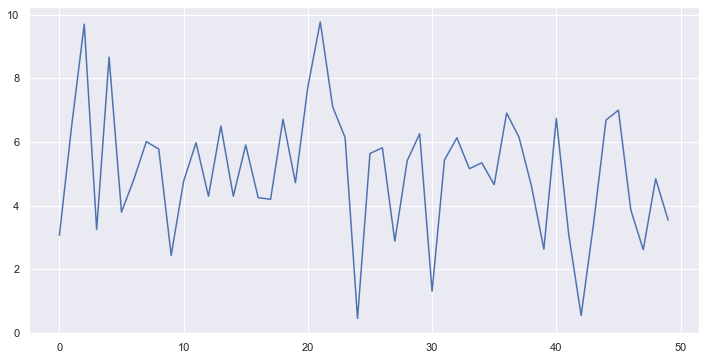

In [80]:
plt.plot(y)
plt.show()

sns.kdeplot(x)  #  변수가 정규 분포를 다름
plt.show()

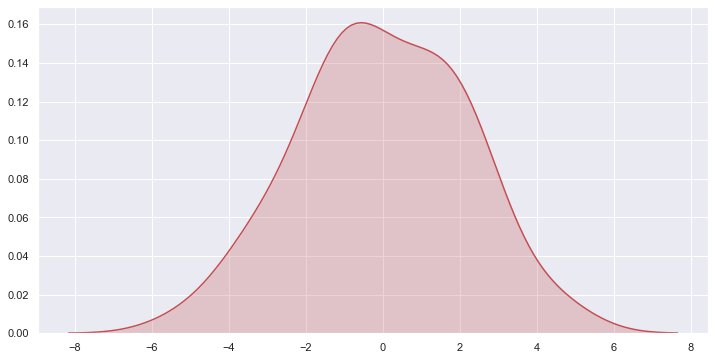

In [86]:
sns.kdeplot(x, shade = True, color = 'r')
plt.show()

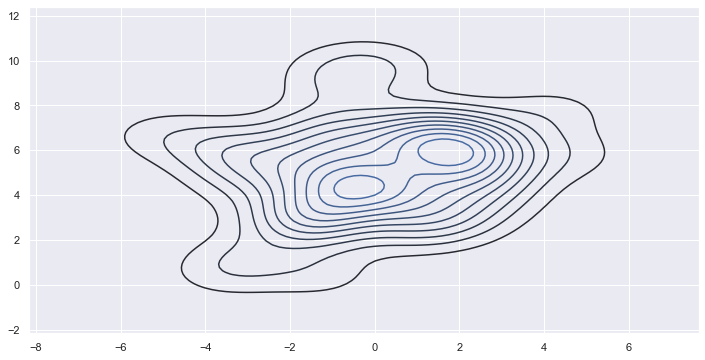

In [87]:
# 두 변수를 표현
sns.kdeplot(x, y)
plt.show()

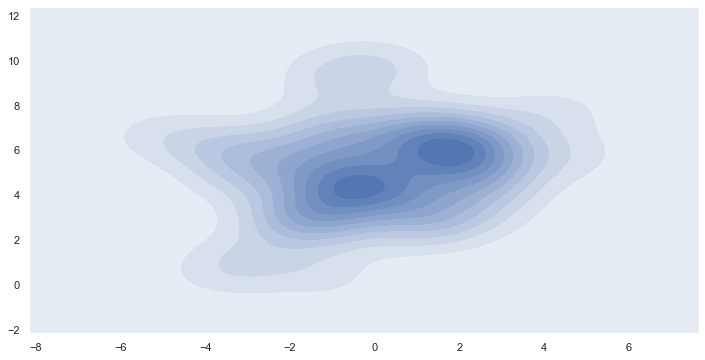

In [89]:
sns.kdeplot(x, y, shade=True)
plt.show()

C:\Python\Anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'n_level'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


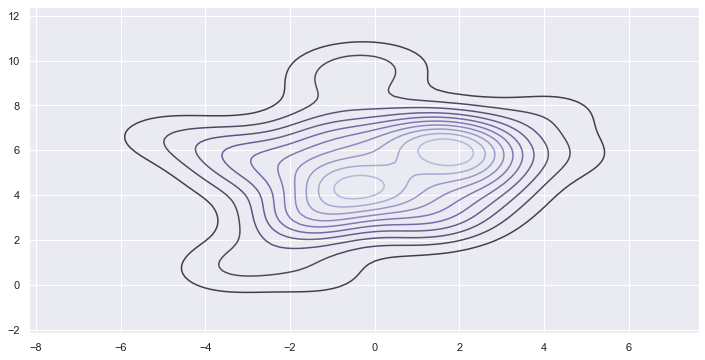

In [90]:
sns.kdeplot(x, y, n_level=30, cmap = 'Purples_d')
plt.show()

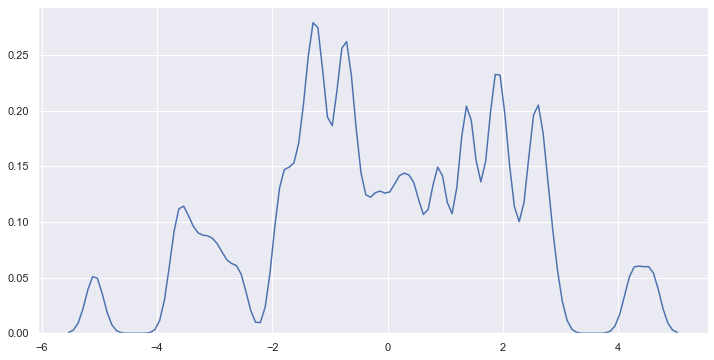

In [91]:
sns.kdeplot(x, bw=.15)
plt.show()

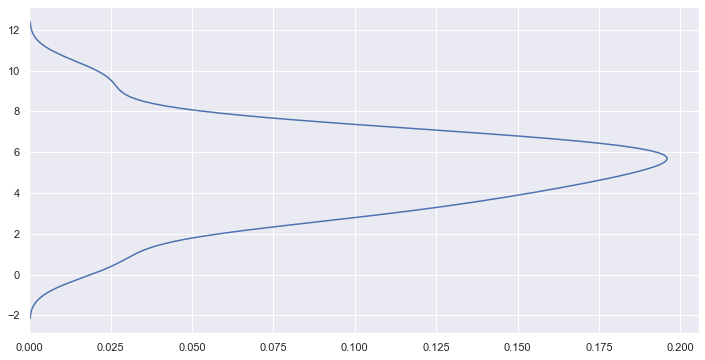

In [92]:
sns.kdeplot(y, vertical=True)
plt.show()

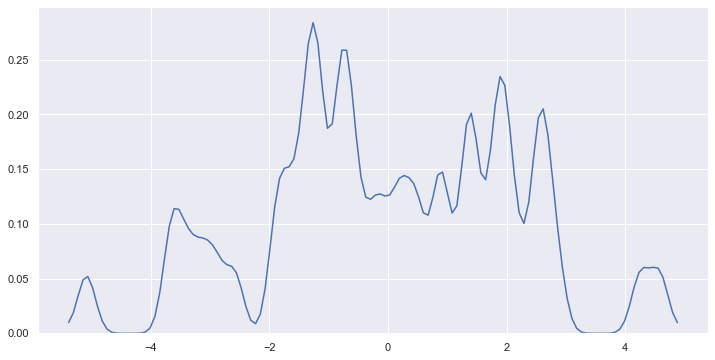

In [93]:
sns.kdeplot(x, bw=.15, cut=2)
plt.show()

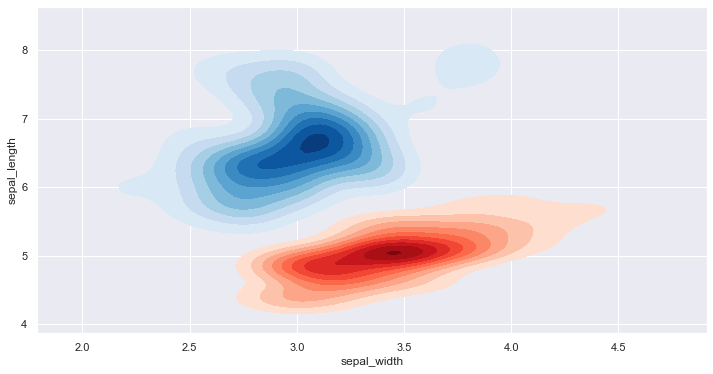

In [94]:
iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
sns.kdeplot(setosa.sepal_width, setosa.sepal_length, cmap="Reds", shade=True, shade_lowest=False)
sns.kdeplot(virginica.sepal_width, virginica.sepal_length, cmap="Blues", shade=True, shade_lowest=False)
plt.show()

# distplot
    
    
    

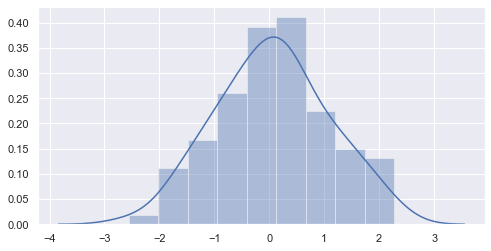

In [95]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(100)
sns.distplot(x)
plt.show()

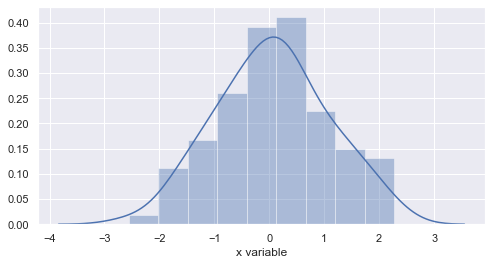

In [96]:
import pandas as pd
x = pd.Series(x, name="x variable")
sns.distplot(x)
plt.show()

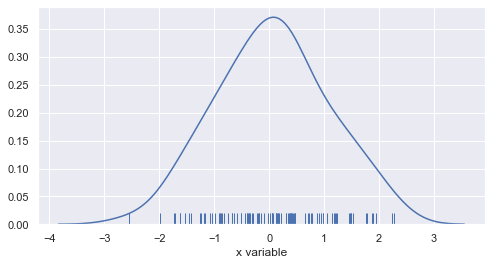

In [97]:
sns.distplot(x, rug=True, hist=False)
plt.show()

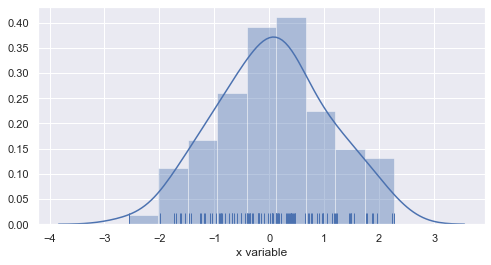

In [98]:
sns.distplot(x, rug=True, hist=True)
plt.show()

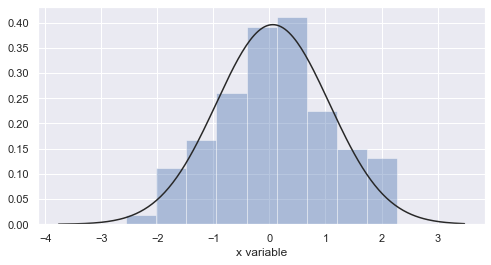

In [99]:
from scipy.stats import norm

sns.distplot(x, fit=norm, kde=False)
plt.show()

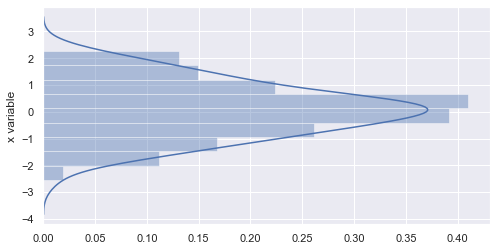

In [100]:
sns.distplot(x, vertical=True)
plt.show()

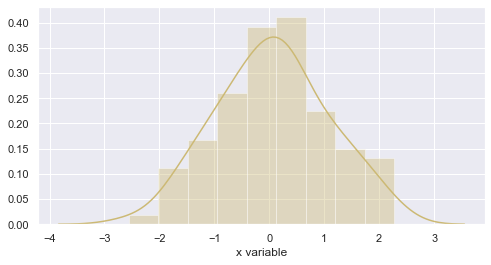

In [101]:
sns.set_color_codes()
sns.distplot(x, color="y")
plt.show()

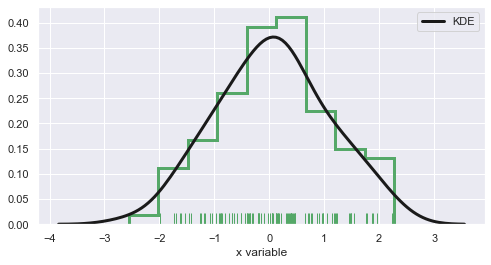

In [102]:
sns.distplot(x, rug=True, rug_kws={"color": "g"},
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3, 
                       "alpha": 1, "color": "g"})
plt.show()

## violinplot

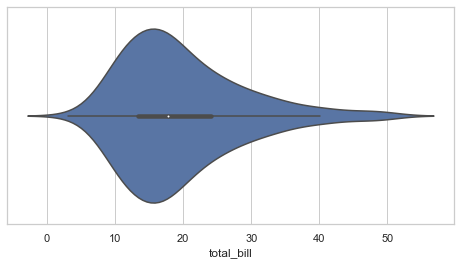

In [103]:
import seaborn as sns
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
sns.violinplot(x=tips["total_bill"])
plt.show()

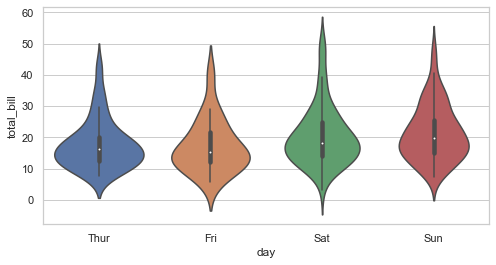

In [104]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.show()

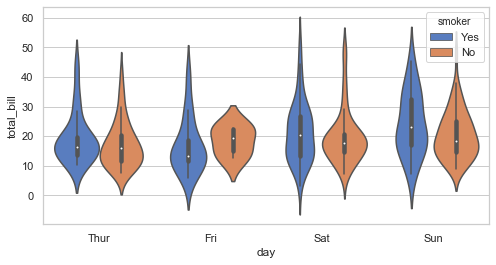

In [105]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")
plt.show()

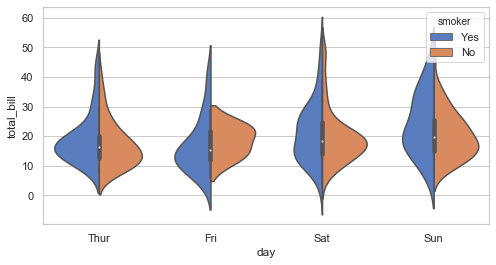

In [106]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted", split=True)
plt.show()

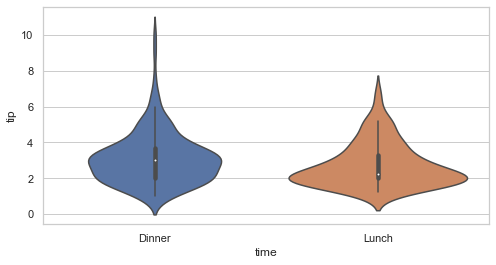

In [107]:
sns.violinplot(x="time", y="tip", data=tips, order=["Dinner", "Lunch"])
plt.show()

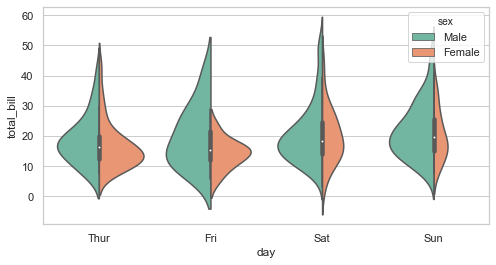

In [108]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set2", split=True, scale="count")
plt.show()

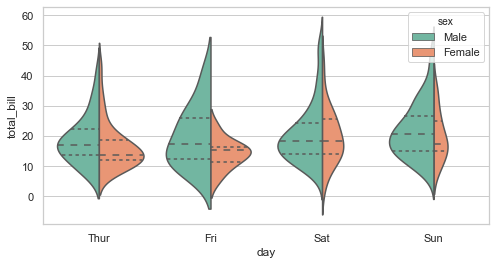

In [109]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

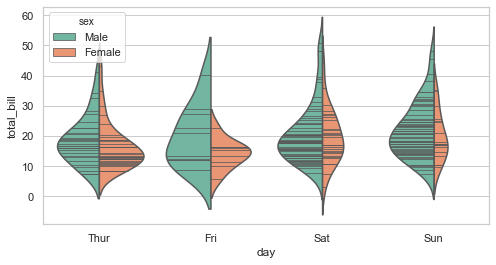

In [110]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set2", split=True, scale="count", inner="stick")
plt.show()

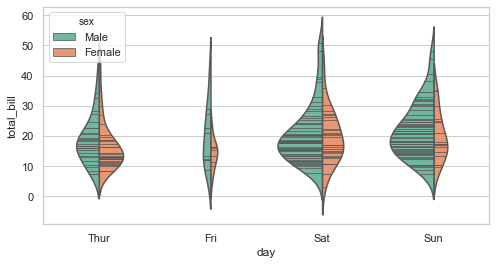

In [111]:
sns.violinplot(x="day", y="total_bill", hue="sex", 
               data=tips, palette="Set2", split=True, 
               scale="count", inner="stick", scale_hue=False)
plt.show()

C:\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


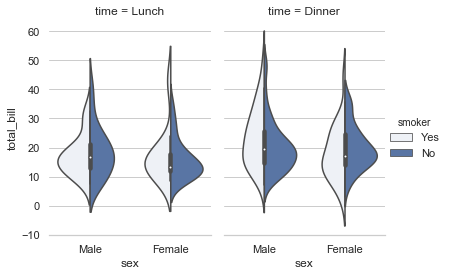

In [112]:
g = sns.FacetGrid(tips, col="time", size=4, aspect=.7)
(g.map(sns.violinplot, "sex", "total_bill", "smoker", split=True).despine(left=True).add_legend(title="smoker"))  
plt.show()

## heatmap

In [113]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
uniform_data

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
        0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
        0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606, 0.0871293 , 0.0202184 ,
        0.83261985, 0.77815675, 0.87001215, 0.97861834, 0.79915856,
        0.46147936, 0.78052918],
       [0.11827443, 0.63992102, 0.14335329, 0.94466892, 0.52184832,
        0.41466194, 0.26455561, 0.77423369, 0.45615033, 0.56843395,
        0.0187898 , 0.6176355 ],
       [0.61209572, 0.616934  , 0.94374808, 0.6818203 , 0.3595079 ,
        0.43703195, 0.6976312 , 0.06022547, 0.66676672, 0.67063787,
        0.21038256, 0.1289263 ],
       [0.31542835, 0.36371077, 0.57019677, 0.43860151, 0.98837384,
        0.10204481, 0.20887676, 0.16130952, 0.65310833, 0.2532916 ,
        0.46631077, 0.24442559],
       [0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236,
        0.36872517, 0.82099323, 0.09710128, 0.83794491, 0.09609841,
        0.97645947,

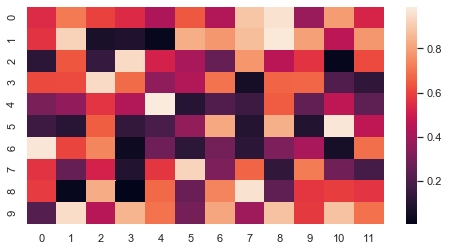

In [114]:
sns.heatmap(uniform_data)
plt.show()

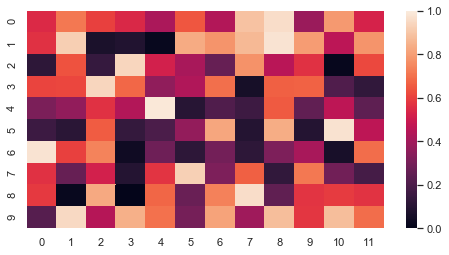

In [115]:
sns.heatmap(uniform_data, vmin=0, vmax=1)
plt.show()

In [116]:
flights = sns.load_dataset("flights")
flights.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [117]:
flights = flights.pivot("month", "year", "passengers")
flights.head(5)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


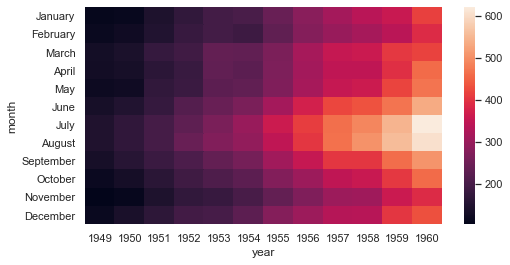

In [118]:
sns.heatmap(flights)
plt.show()

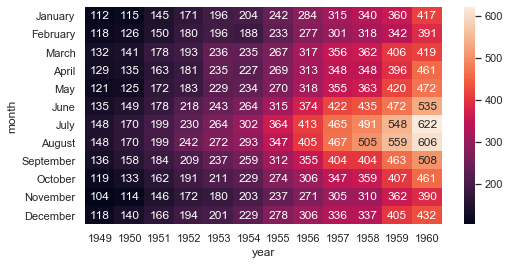

In [119]:
sns.heatmap(flights, annot=True, fmt="d")
plt.show()

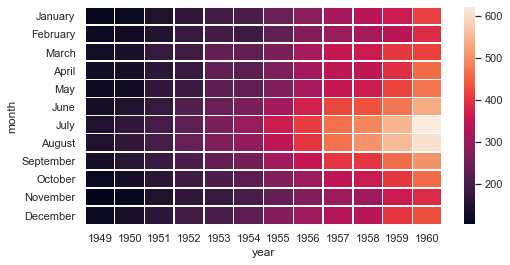

In [120]:
sns.heatmap(flights, linewidths=.5)
plt.show()

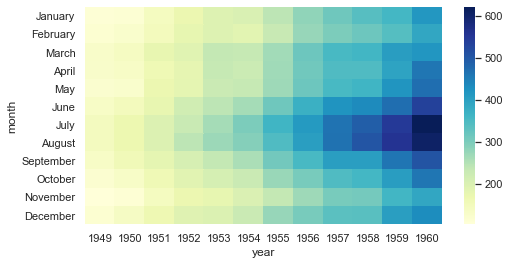

In [121]:
sns.heatmap(flights, cmap="YlGnBu")
plt.show()

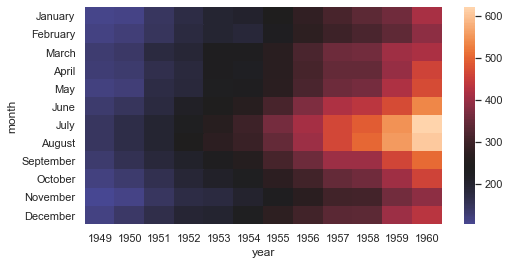

In [122]:
# 특성한 일자를 색상의 센터로 잡는다.
sns.heatmap(flights, center=flights.loc["January", 1955])
plt.show()

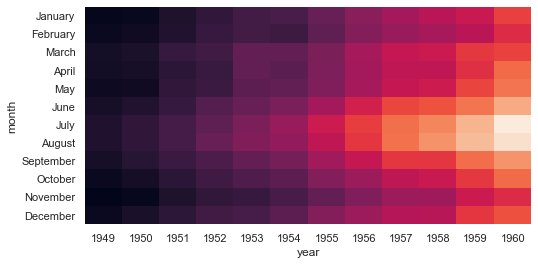

In [123]:
sns.heatmap(flights, cbar=False)
plt.show()

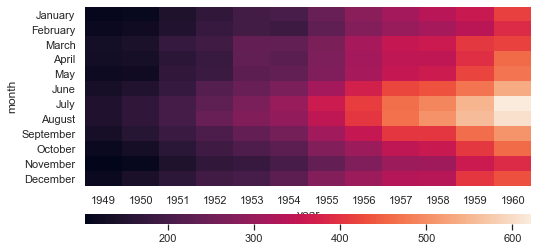

In [124]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(flights, ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})
plt.show()

# PairPlot

- 두 변수와의 상관관계를 보여주는 plot
- 자기 자신과의 관계: 단순한 hist만 보여줌.

In [125]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


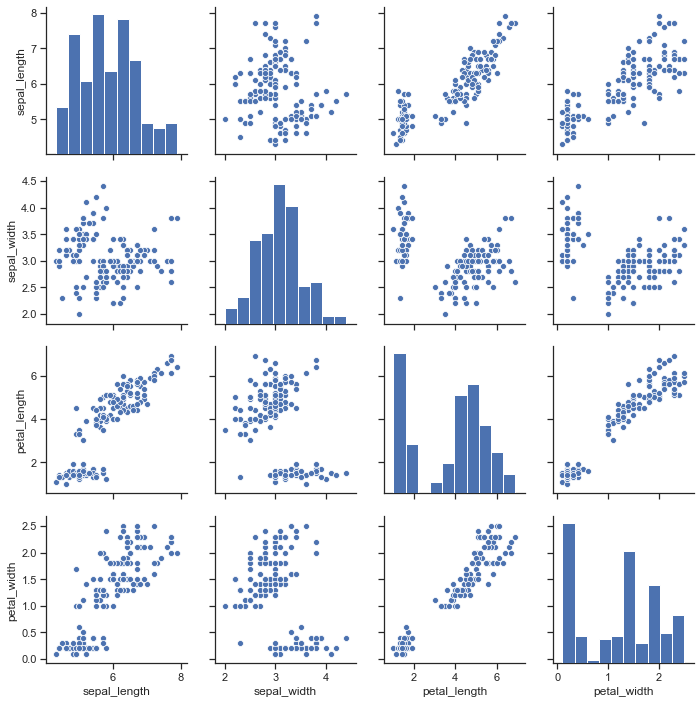

In [126]:
sns.pairplot(iris)
plt.show()

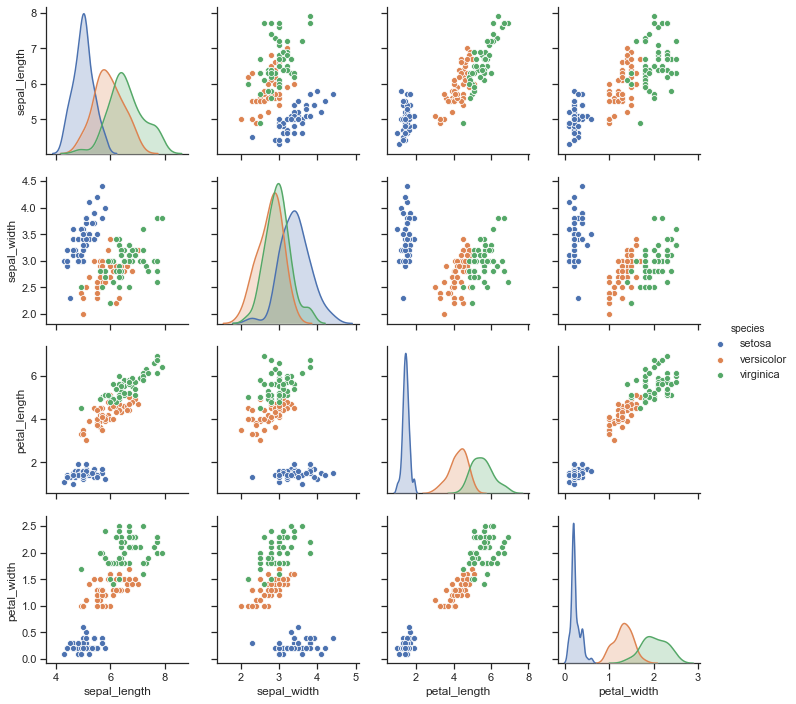

In [127]:
sns.pairplot(iris, hue="species")
plt.show()

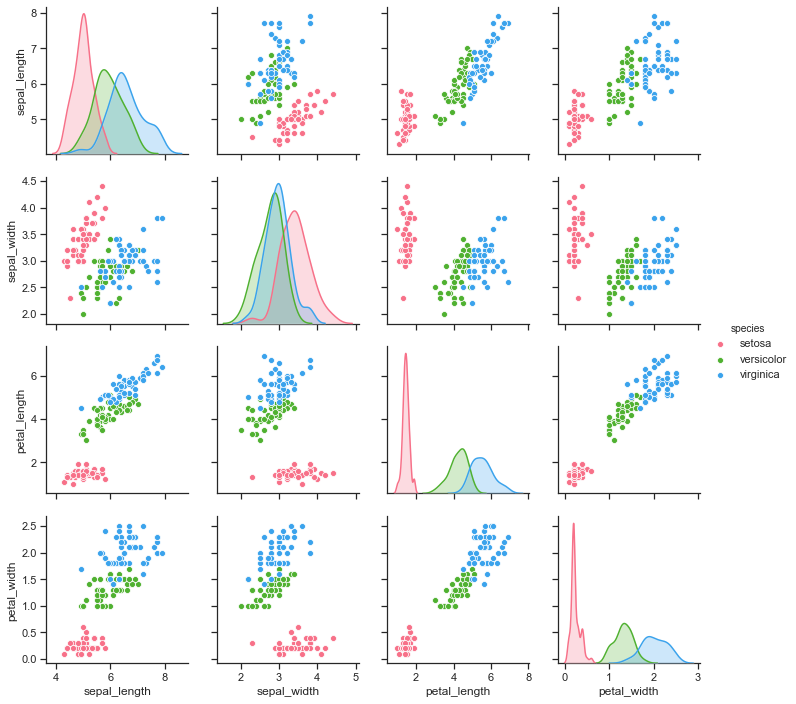

In [128]:
sns.pairplot(iris, hue="species", palette="husl")
plt.show()

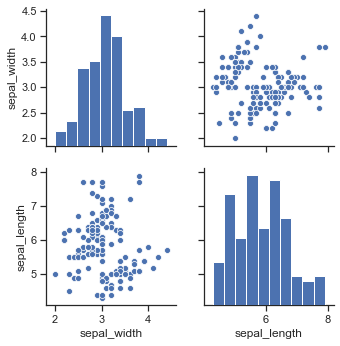

In [129]:
sns.pairplot(iris, vars=["sepal_width", "sepal_length"])
plt.show()

C:\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


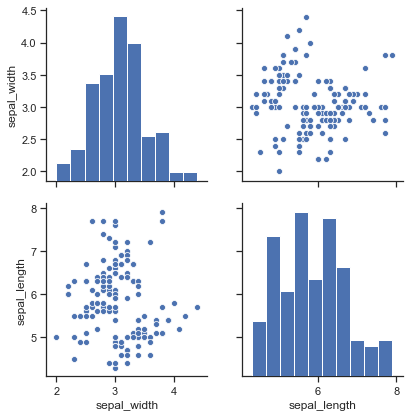

In [130]:
sns.pairplot(iris, size=3, vars=["sepal_width", "sepal_length"])
plt.show()

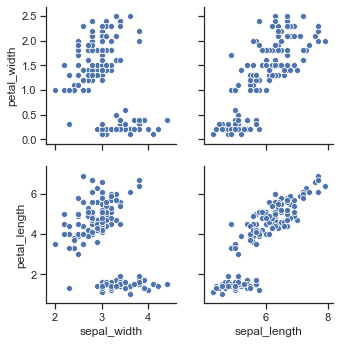

In [131]:
sns.pairplot(iris, x_vars=["sepal_width", "sepal_length"], y_vars=["petal_width", "petal_length"])
plt.show()

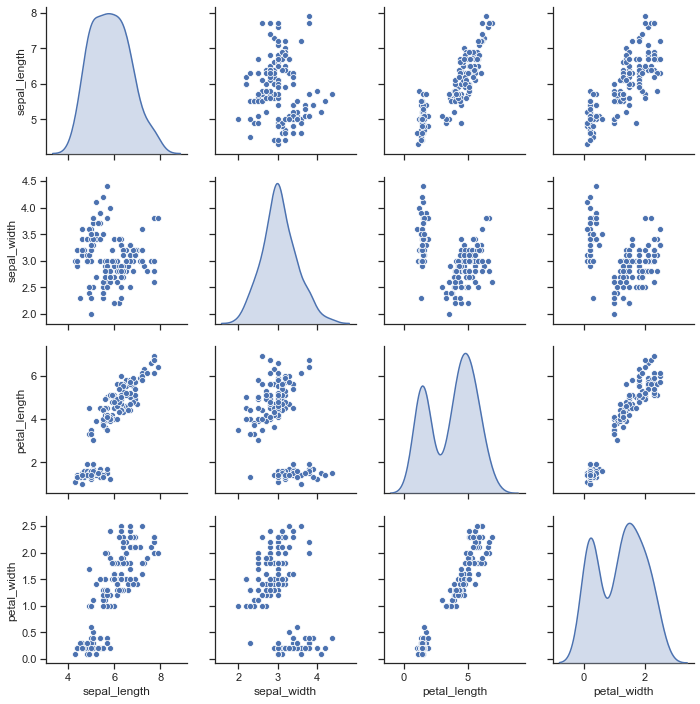

In [132]:
sns.pairplot(iris, diag_kind="kde")
plt.show()

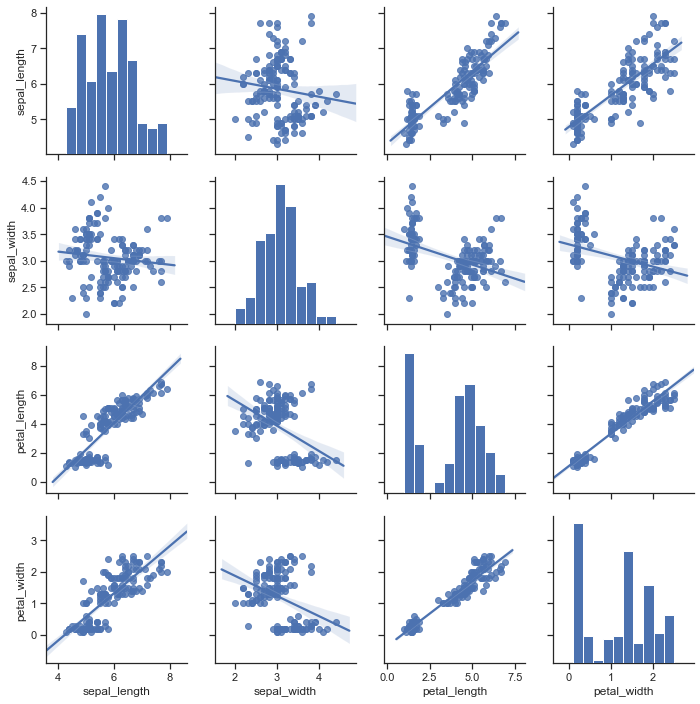

In [133]:
sns.pairplot(iris, kind="reg")
plt.show()

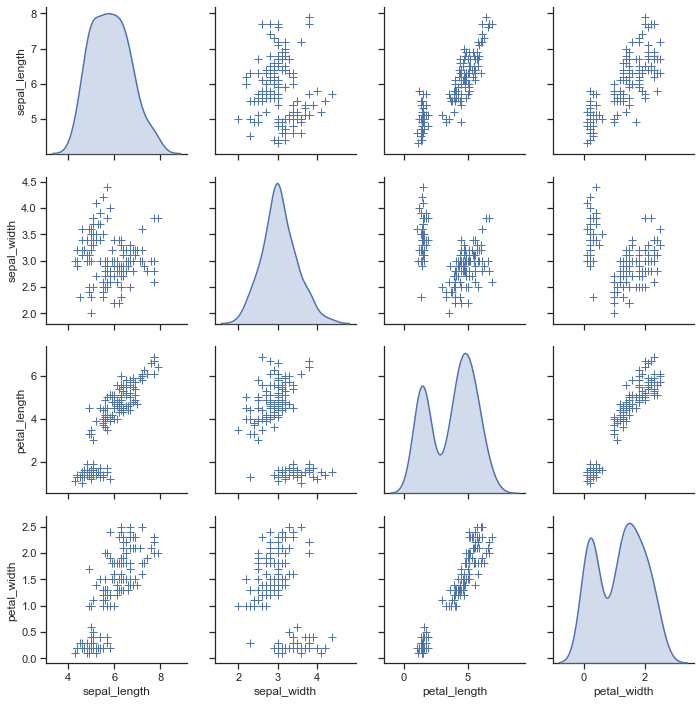

In [134]:
sns.pairplot(iris, diag_kind="kde", markers="+", plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))
plt.show()

## jointplot

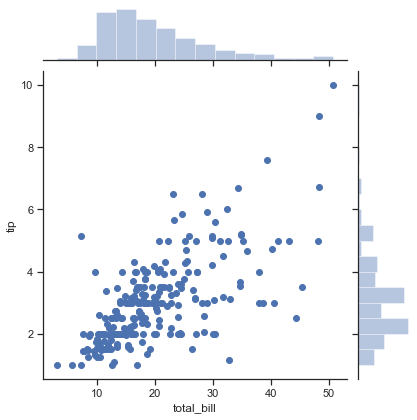

In [135]:
tips = sns.load_dataset("tips")
sns.jointplot(x="total_bill", y="tip", data=tips)
plt.show()

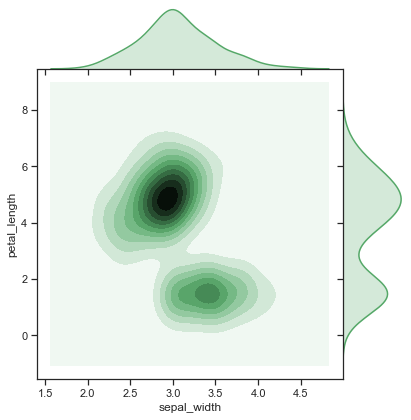

In [136]:
iris = sns.load_dataset("iris")
sns.jointplot("sepal_width", "petal_length", data=iris, kind="kde", space=0, color="g")
plt.show()

## tsplot

C:\Python\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


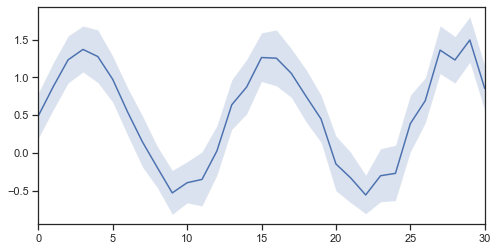

In [137]:
import numpy as np

np.random.seed(0)
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
sns.tsplot(data=data)
plt.show()

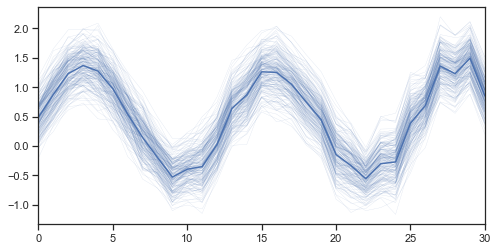

In [138]:
sns.tsplot(data=data, err_style="boot_traces", n_boot=200)
plt.show()

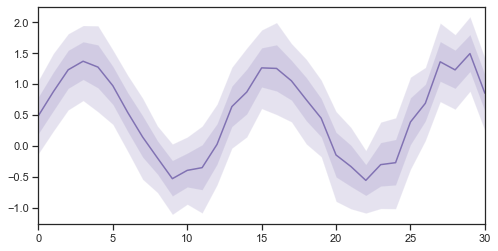

In [139]:
sns.tsplot(data=data, ci=[68, 95], color="m")
plt.show()